In [23]:
%load_ext autoreload
%autoreload 2
import numpy as np
from tqdm import tqdm_notebook
import re

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
def tokenize(text):
    # obtains tokens with a least 1 alphabet
    pattern = re.compile(r'[A-Za-z]+[\w^\']*|[\w^\']*[A-Za-z]+[\w^\']*')
    return pattern.findall(text.lower())

def mapping(tokens):
    word_to_id = dict()
    id_to_word = dict()

    for i, token in enumerate(set(tokens)):
        word_to_id[token] = i
        id_to_word[i] = token

    return word_to_id, id_to_word

def generate_training_data(tokens, word_to_id, window_size):
    N = len(tokens)
    X, Y = [], []

    for i in range(N):
        nbr_inds = list(range(max(0, i - window_size), i)) + \
                   list(range(i + 1, min(N, i + window_size + 1)))
        #print(nbr_inds)
        for j in nbr_inds:
            #print(tokens[j]," ",word_to_id[tokens[j]])
            X.append(word_to_id[tokens[i]])
            Y.append(word_to_id[tokens[j]])
            
    X = np.array(X)
    X = np.expand_dims(X, axis=0)
    Y = np.array(Y)
    Y = np.expand_dims(Y, axis=0)
            
    return X, Y

In [76]:
doc = "The people who do the work in America have never been invisible to the Democratic Party. It is time to make the American Dream real for them again. We need a government that stands up for the hopes, values, and interests of working people, and gives everyone willing to work hard the chance to make the most of their God-given potential. In platform hearings around the country, Americans reaffirmed our belief that this great nation can compete–and succeed–in the 21st Century but only if we take a new approach. One that is both innovative and faithful to the basic economic principles that made this country great. We Democrats want–and we hereby pledge–a government led by Barack Obama that looks out for families in the new economy with health care, retirement security, and help, especially in bad times. Investment in our country–in energy, education, infrastructure, science. A ladder of opportunity for all. Democrats see these as the pillars of a more competitive and fair economy that will allow all Americans to take advantage of the opportunities of our new era."
tokens = tokenize(doc)
word_to_id, id_to_word = mapping(tokens)
X, Y = generate_training_data(tokens, word_to_id, 3)

for i in range(len(X[0])):
  print(id_to_word[X[0][i]]," ",id_to_word[Y[0][i]])

the   people
the   who
the   do
people   the
people   who
people   do
people   the
who   the
who   people
who   do
who   the
who   work
do   the
do   people
do   who
do   the
do   work
do   in
the   people
the   who
the   do
the   work
the   in
the   america
work   who
work   do
work   the
work   in
work   america
work   have
in   do
in   the
in   work
in   america
in   have
in   never
america   the
america   work
america   in
america   have
america   never
america   been
have   work
have   in
have   america
have   never
have   been
have   invisible
never   in
never   america
never   have
never   been
never   invisible
never   to
been   america
been   have
been   never
been   invisible
been   to
been   the
invisible   have
invisible   never
invisible   been
invisible   to
invisible   the
invisible   democratic
to   never
to   been
to   invisible
to   the
to   democratic
to   party
the   been
the   invisible
the   to
the   democratic
the   party
the   it
democratic   invisible
democrati

In [0]:
vocab_size = len(id_to_word)
m = Y.shape[1]
# turn Y into one hot encoding
Y_one_hot = np.zeros((vocab_size, m))
Y_one_hot[Y.flatten(), np.arange(m)] = 1

In [0]:
def initialize_wrd_emb(vocab_size, emb_size):
    """
    vocab_size: int. vocabulary size of your corpus or training data
    emb_size: int. word embedding size. How many dimensions to represent each vocabulary
    """
    WRD_EMB = np.random.randn(vocab_size, emb_size) * 0.01
    
    assert(WRD_EMB.shape == (vocab_size, emb_size))
    return WRD_EMB

def initialize_dense(input_size, output_size):
    """
    input_size: int. size of the input to the dense layer
    output_szie: int. size of the output out of the dense layer
    """
    W = np.random.randn(output_size, input_size) * 0.01
    
    assert(W.shape == (output_size, input_size))
    return W

def initialize_parameters(vocab_size, emb_size):
    WRD_EMB = initialize_wrd_emb(vocab_size, emb_size)
    W = initialize_dense(emb_size, vocab_size)
    
    parameters = {}
    parameters['WRD_EMB'] = WRD_EMB
    parameters['W'] = W
    
    return parameters

In [0]:
def ind_to_word_vecs(inds, parameters):
    """
    inds: numpy array. shape: (1, m)
    parameters: dict. weights to be trained
    """
    m = inds.shape[1]
    WRD_EMB = parameters['WRD_EMB']
    word_vec = WRD_EMB[inds.flatten(), :].T
    
    assert(word_vec.shape == (WRD_EMB.shape[1], m))
    
    return word_vec

def linear_dense(word_vec, parameters):
    """
    word_vec: numpy array. shape: (emb_size, m)
    parameters: dict. weights to be trained
    """
    m = word_vec.shape[1]
    W = parameters['W']
    Z = np.dot(W, word_vec)
    
    assert(Z.shape == (W.shape[0], m))
    
    return W, Z

def softmax(Z):
    """
    Z: output out of the dense layer. shape: (vocab_size, m)
    """
    softmax_out = np.divide(np.exp(Z), np.sum(np.exp(Z), axis=0, keepdims=True) + 0.001)
    
    assert(softmax_out.shape == Z.shape)

    return softmax_out

def forward_propagation(inds, parameters):
    word_vec = ind_to_word_vecs(inds, parameters)
    W, Z = linear_dense(word_vec, parameters)
    softmax_out = softmax(Z)
    
    caches = {}
    caches['inds'] = inds
    caches['word_vec'] = word_vec
    caches['W'] = W
    caches['Z'] = Z
    
    return softmax_out, caches

In [80]:
id_to_word

{0: 'basic',
 1: 'values',
 2: 'families',
 3: 'made',
 4: 'hereby',
 5: 'energy',
 6: 'in',
 7: 'with',
 8: 'advantage',
 9: 'and',
 10: 'is',
 11: 'only',
 12: 'american',
 13: 'security',
 14: 'work',
 15: 'stands',
 16: 'invisible',
 17: 'more',
 18: 'them',
 19: 'most',
 20: 'around',
 21: 'will',
 22: 'party',
 23: 'economic',
 24: 'pillars',
 25: 'everyone',
 26: 'interests',
 27: 'as',
 28: 'hearings',
 29: 'competitive',
 30: 'compete',
 31: 'pledge',
 32: 'take',
 33: 'obama',
 34: 'their',
 35: 'democratic',
 36: 'hopes',
 37: 'the',
 38: 'democrats',
 39: 'god',
 40: 'great',
 41: 'these',
 42: 'care',
 43: 'opportunities',
 44: 'who',
 45: 'science',
 46: 'this',
 47: 'education',
 48: 'era',
 49: 'new',
 50: 'hard',
 51: 'but',
 52: 'it',
 53: 'that',
 54: 'principles',
 55: 'especially',
 56: 'given',
 57: 'have',
 58: 'century',
 59: 'see',
 60: 'government',
 61: '21st',
 62: 'allow',
 63: 'america',
 64: 'time',
 65: 'out',
 66: 'barack',
 67: 'help',
 68: 'faithful',

In [0]:
def cross_entropy(softmax_out, Y):
    """
    softmax_out: output out of softmax. shape: (vocab_size, m)
    """
    m = softmax_out.shape[1]
    cost = -(1 / m) * np.sum(np.sum(Y * np.log(softmax_out + 0.001), axis=0, keepdims=True), axis=1)
    return cost

In [0]:
def softmax_backward(Y, softmax_out):
    """
    Y: labels of training data. shape: (vocab_size, m)
    softmax_out: output out of softmax. shape: (vocab_size, m)
    """
    dL_dZ = softmax_out - Y
    
    assert(dL_dZ.shape == softmax_out.shape)
    return dL_dZ

def dense_backward(dL_dZ, caches):
    """
    dL_dZ: shape: (vocab_size, m)
    caches: dict. results from each steps of forward propagation
    """
    W = caches['W']
    word_vec = caches['word_vec']
    m = word_vec.shape[1]
    
    dL_dW = (1 / m) * np.dot(dL_dZ, word_vec.T)
    dL_dword_vec = np.dot(W.T, dL_dZ)

    assert(W.shape == dL_dW.shape)
    assert(word_vec.shape == dL_dword_vec.shape)
    
    return dL_dW, dL_dword_vec

def backward_propagation(Y, softmax_out, caches):
    dL_dZ = softmax_backward(Y, softmax_out)
    dL_dW, dL_dword_vec = dense_backward(dL_dZ, caches)
    
    gradients = dict()
    gradients['dL_dZ'] = dL_dZ
    gradients['dL_dW'] = dL_dW
    gradients['dL_dword_vec'] = dL_dword_vec
    
    return gradients

def update_parameters(parameters, caches, gradients, learning_rate):
    vocab_size, emb_size = parameters['WRD_EMB'].shape
    inds = caches['inds']
    dL_dword_vec = gradients['dL_dword_vec']
    m = inds.shape[-1]
    
    parameters['WRD_EMB'][inds.flatten(), :] -= dL_dword_vec.T * learning_rate

    parameters['W'] -= learning_rate * gradients['dL_dW']

In [0]:
from datetime import datetime

import matplotlib.pyplot as plt


def skipgram_model_training(X, Y, vocab_size, emb_size, learning_rate, epochs, batch_size=256, parameters=None, print_cost=False, plot_cost=True):
    costs = []
    m = X.shape[1]
    
    if parameters is None:
        parameters = initialize_parameters(vocab_size, emb_size)
    
    begin_time = datetime.now()
    for epoch in range(epochs):
        epoch_cost = 0
        batch_inds = list(range(0, m, batch_size))
        np.random.shuffle(batch_inds)
        for i in batch_inds:
            X_batch = X[:, i:i+batch_size]
            Y_batch = Y[:, i:i+batch_size]
            #print(X_batch," ",Y_batch)
            softmax_out, caches = forward_propagation(X_batch, parameters)
            gradients = backward_propagation(Y_batch, softmax_out, caches)
            update_parameters(parameters, caches, gradients, learning_rate)
            cost = cross_entropy(softmax_out, Y_batch)
            epoch_cost += np.squeeze(cost)
            
        costs.append(epoch_cost)
        if print_cost and epoch % (epochs // 500) == 0:
            print("Cost after epoch {}: {}".format(epoch, epoch_cost))
        if epoch % (epochs // 100) == 0:
            learning_rate *= 0.98
    end_time = datetime.now()
    print('training time: {}'.format(end_time - begin_time))
            
    if plot_cost:
        plt.plot(np.arange(epochs), costs)
        plt.xlabel('# of epochs')
        plt.ylabel('cost')
    return parameters

Cost after epoch 0: 41.93248325993858
Cost after epoch 10: 41.92547701688615
Cost after epoch 20: 41.91749626704366
Cost after epoch 30: 41.90743093120123
Cost after epoch 40: 41.89398200942526
Cost after epoch 50: 41.87546358979166
Cost after epoch 60: 41.85010783746925
Cost after epoch 70: 41.814852940919984
Cost after epoch 80: 41.76560695918764
Cost after epoch 90: 41.69682821348009
Cost after epoch 100: 41.6015498565584
Cost after epoch 110: 41.47339537202148
Cost after epoch 120: 41.30294370354353
Cost after epoch 130: 41.08812714560456
Cost after epoch 140: 40.835327465021706
Cost after epoch 150: 40.554533330502245
Cost after epoch 160: 40.24934161926137
Cost after epoch 170: 39.92578145536904
Cost after epoch 180: 39.59881320392692
Cost after epoch 190: 39.27998007591924
Cost after epoch 200: 38.96557068974978
Cost after epoch 210: 38.65185656480979
Cost after epoch 220: 38.3308157653814
Cost after epoch 230: 37.99027615038602
Cost after epoch 240: 37.63827913222295
Cost after

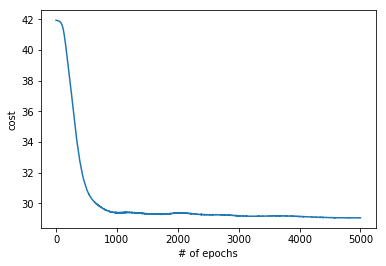

In [87]:
paras = skipgram_model_training(X, Y_one_hot, vocab_size, 100, 0.05, 5000, batch_size=128, parameters=None, print_cost=True)

In [88]:
#1D array to 2D array

X_test = np.arange(vocab_size)
print(X_test)
X_test = np.expand_dims(X_test, axis=0)
print(X_test)
softmax_test, _ = forward_propagation(X_test, paras)
top_sorted_inds = np.argsort(softmax_test, axis=0)[-4:,:]

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117]
[[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
   18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
   36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
   54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
   72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
   90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
  108 109 110 111 112 113 114 115 116 117]]


In [89]:
X_exp = list(id_to_word.keys())
X_exp = np.array(X_exp)
X_exp = np.expand_dims(X_exp, axis=0)

ind_to_word_vecs(X_exp,paras).T[0]

array([ 0.55351379,  3.7930839 ,  1.68615232,  0.23145101,  0.28906618,
        2.27142193, -2.72098571, -0.50286874, -1.1297538 ,  1.01788925,
       -0.77028899,  0.85433424, -1.67582469, -1.19665202, -3.25471564,
        1.84584622,  1.03170271, -0.88837627, -2.7188877 , -0.45217928,
       -2.50826618,  3.03991568, -3.90669957,  1.52864703,  1.92405278,
        0.8890996 , -1.63507612, -2.87415893,  0.73642418,  1.20732687,
        0.52745946,  1.61739464, -1.21995196, -1.01215976, -5.32724741,
        0.6869588 ,  0.49148379, -2.11589455,  0.19249512,  2.27547965,
        0.66794672,  0.32678282,  0.59303174, -2.09618367, -0.1593979 ,
        0.92962558,  0.58371352,  0.82243479, -0.11705163, -2.48658608,
        1.60951648, -0.02943369,  0.42942248,  1.60029597, -0.24124696,
        4.34274007, -0.48625728,  3.12085294, -4.49286169, -1.66652249,
       -1.56906591,  0.57102377,  0.31435628, -2.10956287, -1.8562644 ,
        3.53226825,  0.16354489, -1.74327582, -2.58314706,  0.82

In [90]:
for input_ind in range(vocab_size):
    input_word = id_to_word[input_ind]
    output_words = [id_to_word[output_ind] for output_ind in top_sorted_inds[::-1, input_ind]]
    print("{}'s neighbor words: {}".format(input_word, output_words))

basic's neighbor words: ['that', 'a', 'government', 'americans']
values's neighbor words: ['of', 'for', 'interests', 'the']
families's neighbor words: ['new', 'of', 'our', 'advantage']
made's neighbor words: ['great', 'this', 'economic', 'principles']
hereby's neighbor words: ['government', 'want', 'pledge', 'this']
energy's neighbor words: ['science', 'infrastructure', 'education', 'country']
in's neighbor words: ['times', 'bad', 'investment', 'our']
with's neighbor words: ['retirement', 'care', 'health', 'new']
advantage's neighbor words: ['opportunities', 'americans', 'take', 'of']
and's neighbor words: ['the', 'in', 'of', 'that']
is's neighbor words: ['make', 'and', 'to', 'time']
only's neighbor words: ['take', 'but', '21st', 'if']
american's neighbor words: ['make', 'for', 'real', 'dream']
security's neighbor words: ['especially', 'health', 'retirement', 'care']
work's neighbor words: ['have', 'chance', 'willing', 'everyone']
stands's neighbor words: ['the', 'to', 'that', 'for']
i